In [82]:
!pip install opencv-python
!pip install mediapipe
import cv2
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_holistic = mp.solutions.holistic

#for webcam input
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(
    min_detection_confidence =0.5,
    min_tracking_confidence=0.5) as holistic:
 while cap.isOpened():
    success, image = cap.read()
    if not success:
        print("Ignoring empty camera frame.")
        #If loading avideo, use break instead of continue
        continue
    
    image.flags.writeable = False
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = holistic.process(image)
    print(results)
    break
    
    
cap.release()

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
<class 'mediapipe.python.solution_base.SolutionOutputs'>


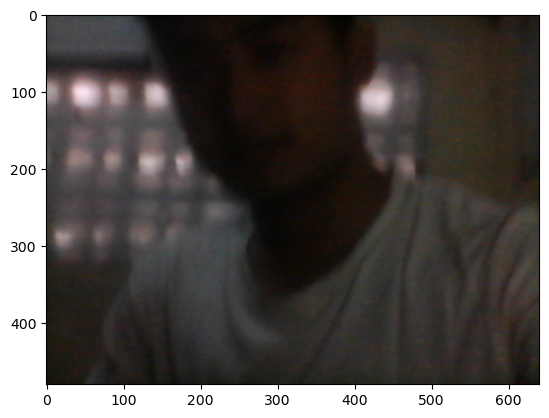

In [83]:
plt.imshow(image)

In [84]:
#Convert mediapipe to dataframe
import matplotlib.pyplot as plt
import pandas as pd

face = pd.DataFrame()
pose = pd.DataFrame()
left_hand = pd.DataFrame()
right_hand = pd.DataFrame()

if results.face_landmarks:
    for i, point in enumerate(results.face_landmarks.landmark):
        face.loc[i, ['x', 'y', 'z']] = [point.x, point.y, point.z]
if results.pose_landmarks:
    for i, point in enumerate(results.pose_landmarks.landmark):
        pose.loc[i, ['x', 'y', 'z']] = [point.x, point.y, point.z]
if results.left_hand_landmarks:
    for i, point in enumerate(results.left_hand_landmarks.landmark):
        left_hand.loc[i, ['x', 'y', 'z']] = [point.x, point.y, point.z]
if results.right_hand_landmarks:  # Fixed the attribute name here
    for i, point in enumerate(results.right_hand_landmarks.landmark):
        right_hand.loc[i, ['x', 'y', 'z']] = [point.x, point.y, point.z]

        

In [85]:
#landmarks = pd.DataFrame()
#for i, point in enumerate(results.face_landmarks.landmark):
 #   landmarks.loc[i,'x'] = point.x
  #  landmarks.loc[i,'y'] = point.y
   # landmarks.loc[i,'z'] = point.z
   

<AxesSubplot:>

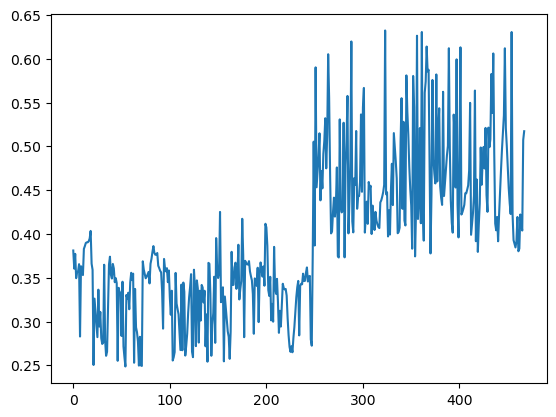

In [86]:
landmarks['x'].plot()

<AxesSubplot:xlabel='x', ylabel='y'>

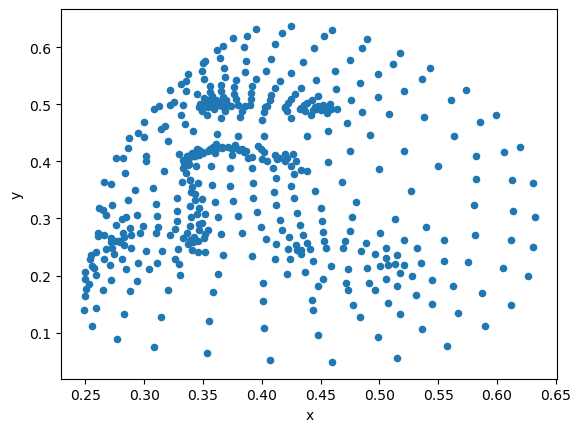

In [87]:
landmarks.plot(x='x', y='y', kind='scatter')

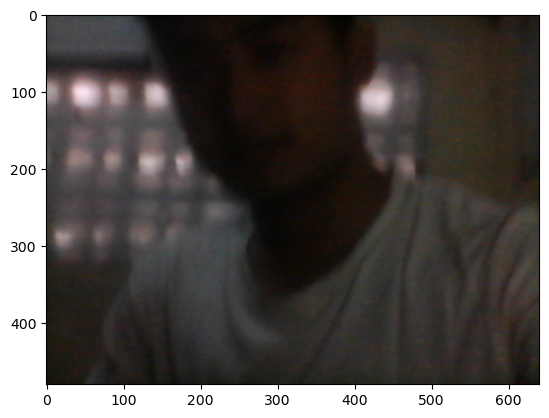

In [88]:
plt.imshow(image)

In [89]:
results.pose_world_landmarks